In [42]:
import folium
import time
from folium import plugins
import numpy as np
import matplotlib.pyplot as plt
import geopy as gp

In [43]:
def plotData(dataList,xvar,yvar,percentile,fileName) :
    fig = plt.figure()
    if xvar == 'LAICEV61_Total' :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,6)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAI SL2P')
        plt.xlabel('LAI In-Situ')
    elif xvar == "fcover_Total" : 
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.90*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.10*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FCOVER SL2P')
        plt.xlabel('FCOVER In-Situ')
    elif xvar == 'Daily_Integrated_Black_Sky_fAPAR_Total' :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.95*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.05*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FAPAR SL2P')
        plt.xlabel('FIPAR In-Situ')
    elif  xvar == 'PAIeCEV61_Total' :
        plt.plot([0,4],[0,4],'k--')
        plt.ylim(0,4)
        plt.xlim(0,4)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('PAIe SL2P')
        plt.xlabel('PAIe In-Situ')
    else :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        
    error = np.zeros(len(dataList))
    correct = np.zeros(len(dataList)) 
    for n in range(0,len(dataList)) :
        if ( (dataList[n][yvar])[2]['data'] ) :
            actual = np.array(dataList[n][xvar])
            residual = np.array((dataList[n][yvar])[2]['data'])/1000-actual
            residualAbs = np.absolute(residual)
            index = np.where(residualAbs<np.percentile(residualAbs,percentile))
            filteredresiduals = residual[index[0]]
            #print(filteredresiduals)
            error[n] = np.median(filteredresiduals)
            estimate = actual + np.median(filteredresiduals)
            x = actual
            y = estimate
            if xvar == 'LAICEV61_Total' :
                laierror = (np.array(dataList[n]['PAIEMiller_Total']) -np.maximum(np.array(dataList[n]['PAIeLAI2000(3)_Total']) ,np.array(dataList[n]['PAIeLAI2000(4)_Total']))) * np.array(dataList[n]['PAIeCEV61_Total']) / (0.1+np.array(dataList[n]['LAICEV61_Total'])) 
                xerror = (np.array(dataList[n]['LAICEV61std_total'])**2 +  (laierror/2)**2 )**(0.5)
                correct[n] = np.absolute(error[n])<np.maximum(0.2*actual,0.75)
            elif xvar == "fcover_Total" : 
                xerror = np.array(dataList[n]['fcoverstd_Total']);
                correct[n] = np.absolute(error[n])<np.maximum(0.15*actual,0.10)
            elif xvar == 'Daily_Integrated_Black_Sky_fAPAR_Total' :
                xerror = np.array(dataList[n]['fcoverstd_Total']);
                correct[n] = np.absolute(error[n])<np.maximum(0.15*actual,0.10)
            elif xvar == 'PAIeCEV61_Total' :
                laierror = (np.array(dataList[n]['PAIEMiller_Total']) - np.maximum(np.array(dataList[n]['PAIeLAI2000(3)_Total']) ,np.array(dataList[n]['PAIeLAI2000(4)_Total'])))
                xerror = laierror/2
                correct[n] = np.absolute(error[n])<np.maximum(0.2*actual,0.75)
            else :
                xerror = 0;
        
            yerror = np.ptp(filteredresiduals)
            #print(yerror)
            # colour based on needleaf fraction
            if dataList[n]['NF'] == 1:
                symbolColour = 'b'
            elif dataList[n]['BF'] == 1:
                symbolColour = 'r'
            else :
                symbolColour = 'y'

            # set symbol size to clumping index
            symbolSize = 20* (1- (np.array(dataList[n]['PAIeCEV61_Total']) /  (0.0001+np.array(dataList[n]['PAICEV61_Total']))))
            
            if dataList[n]['Location'] == 'Geraldton2020' :
                plt.plot(x,y,symbolColour+'o',markersize =symbolSize )
            elif dataList[n]['Location'] == 'HayRiver2019' :
                plt.plot(x,y,symbolColour+'>',markersize =symbolSize )
            elif dataList[n]['Location'] == 'Labrador2019' :
                plt.plot(x,y,symbolColour+'*',markersize =symbolSize )
            elif dataList[n]['Location'] == 'Merbleue2019' :
                plt.plot(x,y,symbolColour+'<',markersize =symbolSize )
            elif dataList[n]['Location'] == 'MtPolley2019' :
                plt.plot(x,y,symbolColour+'p',markersize =symbolSize )
            elif dataList[n]['Location'] == 'PeaceRiver2019' :
                plt.plot(x,y,symbolColour+'s',markersize =symbolSize )
            elif dataList[n]['Location'] == 'TurkeyPoint2019' :
                plt.plot(x,y,symbolColour+'d',markersize =symbolSize )
            elif dataList[n]['Location'] == 'Vancouver2019' :
                plt.plot(x,y,symbolColour+'v',markersize =symbolSize )
            elif dataList[n]['Location'] == 'Yellowknife2019' :
                plt.plot(x,y,symbolColour+'^',markersize =symbolSize )
            else :
                plt.plot(x,y,symbolColour+'o',markersize =symbolSize )

                            
            # circle lichen plots
            #if dataList[n]['Lichen'] >0.5:
            #     plt.plot(x,y,'co',markerfacecolor='none')
                    
            plt.errorbar(x,y,xerror,yerror,'k-.',linewidth=0.2)
            #print(n,actual,estimate,symbolSize )

    textstr = '\n'.join((
        r'$N=%d$' % (len(dataList), ),
        r'$MAE=%.2f$' % (np.median(np.absolute(error)), ),
        r'$RMSE=%.2f$' % (np.power(np.mean(np.power(error,2)),0.5), ),
        r'$BIAS=%.2f$' % (np.mean(error), ),
        r'$PRECISION=%.2f$' % (np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5), ),
        r'$ACC=%.2f$' % (np.mean(correct)*100,)))
    ax = plt.gca()
    ax.text(0.015, 0.985, textstr,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)
    fig.savefig(fileName, bbox_inches='tight')

In [51]:
def plotData(dataList,xvar,yvar,percentile,fileName) :
    fig = plt.figure()
    if xvar == 'LAICEV61_Total' :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,6)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAI SL2P')
        plt.xlabel('LAI In-Situ')
    elif xvar == "fcover_Total" : 
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.90*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.10*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FCOVER SL2P')
        plt.xlabel('FCOVER In-Situ')
    elif xvar == 'Daily_Integrated_Black_Sky_fAPAR_Total' :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.95*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.05*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FAPAR SL2P')
        plt.xlabel('FIPAR In-Situ')
    elif  xvar == 'PAIeCEV61_Total' :
        plt.plot([0,4],[0,4],'k--')
        plt.ylim(0,4)
        plt.xlim(0,4)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('PAIe SL2P')
        plt.xlabel('PAIe In-Situ')
    else :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        
    error = np.zeros(len(dataList))
    correct = np.zeros(len(dataList)) 
    for n in range(0,len(dataList)) :
        if ( (dataList[n][yvar])[2]['data'] ) :
            actual = np.array(dataList[n][xvar])
            residual = np.array((dataList[n][yvar])[2]['data'])/1000-actual
            stdError = np.array((dataList[n][yvar])[5]['data'])/1000
            residualAbs = np.absolute(residual)
            index = np.where(residualAbs<np.percentile(residualAbs,percentile))
            filteredresiduals = residual[index[0]]
            stdError = np.median(stdError[index[0]])
            #print(filteredresiduals)
            error[n] = np.median(filteredresiduals)
            estimate = actual + np.median(filteredresiduals)
            x = actual
            y = estimate
            if xvar == 'LAICEV61_Total' :
                laierror = (np.array(dataList[n]['PAIEMiller_Total']) -np.maximum(np.array(dataList[n]['PAIeLAI2000(3)_Total']) ,np.array(dataList[n]['PAIeLAI2000(4)_Total']))) * np.array(dataList[n]['PAIeCEV61_Total']) / (0.1+np.array(dataList[n]['LAICEV61_Total'])) 
                xerror = (np.array(dataList[n]['LAICEV61std_total'])**2 +  (laierror/2)**2 )**(0.5)
                correct[n] = np.absolute(error[n])<np.maximum(0.25*actual,0.75)
            elif xvar == "fcover_Total" : 
                xerror = np.array(dataList[n]['fcoverstd_Total'])
                correct[n] = np.absolute(error[n])<np.maximum(0.20*actual,0.10)
            elif xvar == 'Daily_Integrated_Black_Sky_fAPAR_Total' :
                xerror = np.array(dataList[n]['fcoverstd_Total']);
                correct[n] = np.absolute(error[n])<np.maximum(0.20*actual,0.10)
            elif xvar == 'PAIeCEV61_Total' :
                laierror = (np.array(dataList[n]['PAIEMiller_Total']) - np.maximum(np.array(dataList[n]['PAIeLAI2000(3)_Total']) ,np.array(dataList[n]['PAIeLAI2000(4)_Total']))) 
                xerror = laierror/2
                correct[n] = np.absolute(error[n])<np.maximum(0.25*actual,0.75)
            else :
                xerror = 0;
        
            yerror = ((np.ptp(residual)/4/(len(residual)**0.5))**2 +  stdError**2)**0.5 #/(len(filteredresiduals)**0.5)
            #print((np.ptp(residual)/4/(len(residual)**0.5)) ,stdError)
            # colour based on needleaf fraction
            if dataList[n]['NF'] == 1:
                symbolColour = 'b'
            elif dataList[n]['BF'] == 1:
                symbolColour = 'r'
            else :
                symbolColour = 'y'

            # set symbol size to clumping index
            symbolSize = 20* (1- (np.array(dataList[n]['PAIeCEV61_Total']) /  (0.0001+np.array(dataList[n]['PAICEV61_Total']))))
            
            if dataList[n]['Location'] == 'Geraldton2020' :
                plt.plot(x,y,symbolColour+'o',markersize =symbolSize )
            elif dataList[n]['Location'] == 'HayRiver2019' :
                plt.plot(x,y,symbolColour+'>',markersize =symbolSize )
            elif dataList[n]['Location'] == 'Labrador2019' :
                plt.plot(x,y,symbolColour+'*',markersize =symbolSize )
            elif dataList[n]['Location'] == 'Merbleue2019' :
                plt.plot(x,y,symbolColour+'<',markersize =symbolSize )
            elif dataList[n]['Location'] == 'MtPolley2019' :
                plt.plot(x,y,symbolColour+'p',markersize =symbolSize )
            elif dataList[n]['Location'] == 'PeaceRiver2019' :
                plt.plot(x,y,symbolColour+'s',markersize =symbolSize )
            elif dataList[n]['Location'] == 'TurkeyPoint2019' :
                plt.plot(x,y,symbolColour+'d',markersize =symbolSize )
            elif dataList[n]['Location'] == 'Vancouver2019' :
                plt.plot(x,y,symbolColour+'v',markersize =symbolSize )
            elif dataList[n]['Location'] == 'Yellowknife2019' :
                plt.plot(x,y,symbolColour+'^',markersize =symbolSize )
            else :
                plt.plot(x,y,symbolColour+'o',markersize =symbolSize )

                            
            # circle lichen plots
            #if dataList[n]['Lichen'] >0.5:
            #     plt.plot(x,y,'co',markerfacecolor='none')
                    
            plt.errorbar(x,y,xerror,yerror,'k-.',linewidth=0.2)
            #print(n,actual,estimate,symbolSize )

    textstr = '\n'.join((
        r'$N=%d$' % (len(dataList), ),
        r'$MAE=%.2f$' % (np.median(np.absolute(error)), ),
        r'$U=%.2f$' % (np.power(np.mean(np.power(error,2)),0.5), ),
        r'$A=%.2f$' % (np.mean(error), ),
        r'$P=%.2f$' % (np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5), ),
        r'$THRESH=%.2f$%%' % (np.mean(correct)*100,)))
    ax = plt.gca()
    ax.text(0.015, 0.985, textstr,
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes)
    fig.savefig(fileName, bbox_inches='tight')

In [57]:
import pickle
allDataLAI = []
allDatafAPAR = []
allDatafCOVER = []
with open("E:/wp3/Validation/LAIGBOV.txt", "rb") as fp:   #Pickling
    allDataLAI = pickle.load(fp)
with open("E:/wp3/Validation/fAPARGBOV.txt", "rb") as fp:   #Pickling
    allDatafAPAR = pickle.load(fp)
with open("E:/wp3/Validation/fCOVERGBOV.txt", "rb") as fp:   #Pickling
    allDatafCOVER = pickle.load(fp)

In [58]:
print( allDataLAI[0])

{'sampleLAI': [{'bandName': 'date', 'data': [18230, 17857.95918367347, 17857.95918367347, 18230, 18230, 18230, 18230, 17857.95918367347, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 18230, 17857.95918367347]}, {'bandName': 'QC', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, {'bandName': 'estimateLAI', 'data': [1.1023959862873387, 1.1076456365235388, 1.003118711933474, 1.0356573117690484, 1.0534551546864326, 1.0845310378358533, 1.116204844351401, 1.121589325039994, 1.0152707051935903, 1.0181209271009428, 1.0251717456335867, 1.0552667306853043, 1.0851156416518473, 1.1125196255936536, 1.0280650677525973, 1.0240682987466003, 1.0240060813255771, 1.0496594735011904, 1.0734328951551082, 1.0943158237691597, 1.0529263512480385, 1.0408646811271363, 1.031030483959466, 1.039003705053976, 1.0542797503464434, 1.072728532568711, 1.049089020660956, 1.033

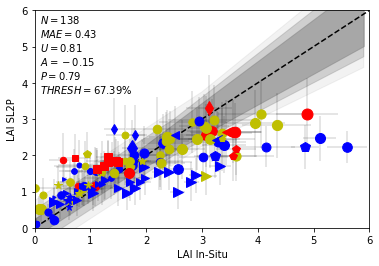

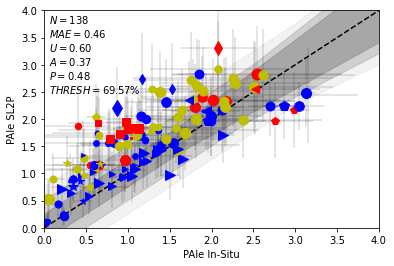

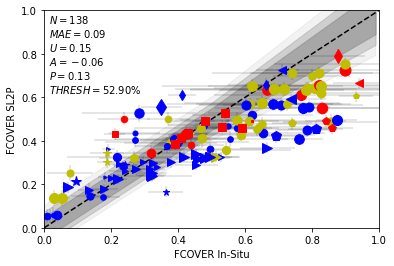

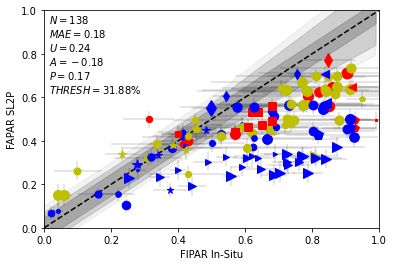

In [55]:
plotData(allDataLAI,'LAICEV61_Total','sampleLAI',50,'E:\wp3\Validation\LAI3.png')
plotData(allDataLAI,'PAIeCEV61_Total','sampleLAI',50,'E:\wp3\Validation\PAI3.png')
plotData(allDatafCOVER,'fcover_Total','samplefCOVER',50,'E:\wp3\Validation\FCOVER3.png')
plotData(allDatafAPAR,'Daily_Integrated_Black_Sky_fAPAR_Total','samplefAPAR',50,'E:\wp3\Validation\FAPAR3.png')

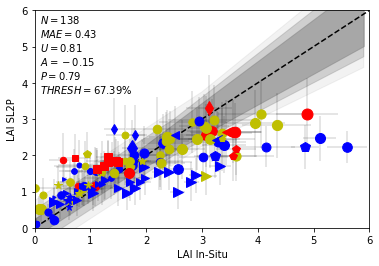

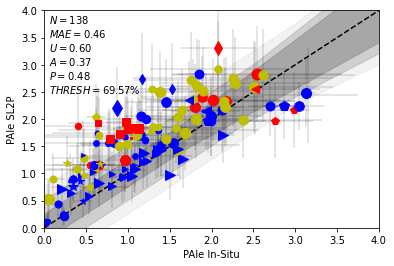

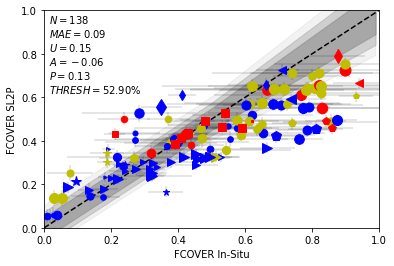

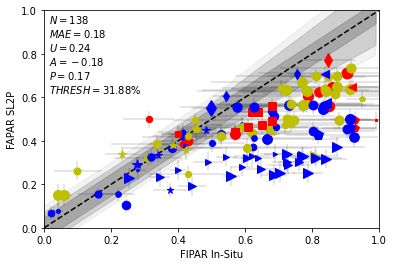

In [54]:
plotData(allData,'LAICEV61_Total','sampleLAI',50,'E:\wp3\Validation\LAI3.png')
plotData(allData,'PAIeCEV61_Total','sampleLAI',50,'E:\wp3\Validation\PAI3.png')
plotData(allData,'fcover_Total','samplefCOVER',50,'E:\wp3\Validation\FCOVER3.png')
plotData(allData,'Daily_Integrated_Black_Sky_fAPAR_Total','samplefAPAR',50,'E:\wp3\Validation\FAPAR3.png')